# Computing Indifference Curves

## Introduction
If a decision-maker is indifferent between any two choices that provide the same level of utility, then we can plot the set of all choices that provide the same level of utility. This set of choices is called an indifference curve. Let the decision maker's utility function be $U:X\rightarrow\mathbb{R}$, where $X$ is the set of all possible objects. Then, the indifference curve is given by:

$$
U(x^{\star}_{1},\dots,x^{\star}_{m}) - U^{\star} = 0
$$

where $U^{\star}$ is the level of utility provided by the set of choices on the indifference curve, and $x^{\star}_{1},\dots,x^{\star}_{m}$ are the choices that provide the level of utility $U_{\star}$. 

### Learning Objectives
In this example, we compute indifference curves for some common utility functions, e.g., `Linear`, `Cobb-Douglas` and `Leontief` utility using the [VLDecisionsPackage.jl](https://github.com/varnerlab/VLDecisionsPackage.jl) package. 

## Setup

In [1]:
include("Include.jl")

  Activating project at `~/Desktop/julia_work/CHEME-5760-Examples-F23`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLDecisionsPackage.jl.git`
    Updating `~/Desktop/julia_work/CHEME-5760-Examples-F23/Project.toml`
  [10f378ab] ~ VLDecisionsPackage v0.1.0 `https://github.com/varnerlab/VLDecisionsPackage.jl.git#main` ⇒ v0.1.0 `https://github.com/varnerlab/VLDecisionsPackage.jl.git#main`
    Updating `~/Desktop/julia_work/CHEME-5760-Examples-F23/Manifest.toml`
  [79e6a3ab] + Adapt v3.6.2
  [4fba245c] + ArrayInterface v7.4.11
  [187b0558] + ConstructionBase v1.5.3
  [6a86dc24] + FiniteDiff v2.21.1
  [d3d80556] + LineSearches v7.2.0
  [d41bc354] + NLSolversBase v7.8.3
  [429524aa] + Optim v1.7.7
  [d96e819e] + Parameters v0.12.3
  [85a6dd25] + PositiveFactorizations v0.2.4
  [efcf1570] + Setfield v1.1.1
  [3a884ed6] + UnPack v1.0.2
  [10f378ab] ~ VLDecisionsPackage v0.1.0 `https://github.com/varnerlab/VLDecisionsPackage.jl

TravelChoiceSurveyDataSet (generic function with 1 method)

### Linear Utility Functions
A `linear` utility function assumes an individual's utility is directly proportional to the feature variables, e.g., the quantity of a good or service consumed, the state of the world, etc. A `linear` utility function is given by:

$$
\begin{equation}
U(x) = \alpha^{T}\cdot{x} = \sum_{i=1}^{m}\alpha_{i}x_{i}
\end{equation}
$$
    
The term $\alpha^{T}\cdot{x}$ denotes the inner (or scalar) product between the $m\times{1}$ parameter vector $\alpha$ and the $m\times{1}$ vector of feature variables $x$, where $x_{i}\geq{0}$ and $\alpha_{i}\geq{0}$.  

#### Indifference
The set of indifferent choices for a given utility $U^{\star}$ for a `Linear` utility function is computed by solving the equation:

$$
\begin{equation}
\sum_{i=1}^{m}\alpha_{i}x^{\star}_{i} - U^{\star} = 0
\end{equation}
$$

for the choices (or features) $x^{\star}_{1},\dots,x^{\star}_{m}$. We do this by creating a `VLLinearUtilityFunction` that holds the parameter vector $\alpha$, and then we use a `for` loop to iterate through a range of $U^{\star}$ values. During each pass of the loop, we:

* Setup the `lower` and `upper` bounds that are choice or feature variables are allowed to assume (we search this range for indifferent values)
* We compute the set of indifference set, by calling the `indifference(...)` method which is exported from the [VLDecisionsPackage.jl](https://github.com/varnerlab/VLDecisionsPackage.jl) package
* We plot the indifferent values using the `plot(...)` function which is exported from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package

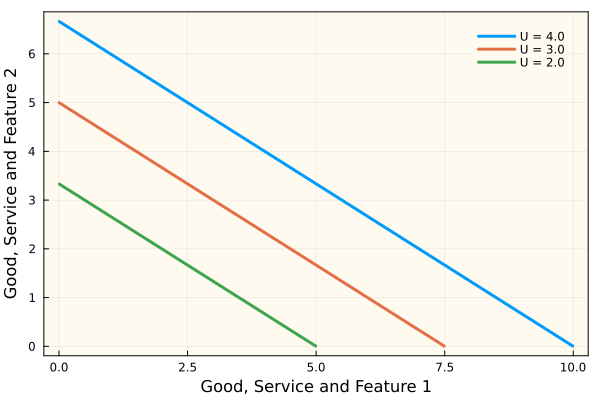

In [10]:
p = plot()
Umax = [4.0,3.0,2.0];
α = [0.4,0.6];
model = build(VLLinearUtilityFunction, (
    α = α,    
));

for U ∈ Umax
    
    # setup the bounds -
    bounds = [
        0.0 U/α[1];
        0.0 U/α[2];
    ];

    # call -
    XLINEAR = indifference(model, utility=U, bounds=bounds);
    
    # plot -
    plot!(XLINEAR[:,1],XLINEAR[:,2],label="U = $(U)", lw=3, 
        bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent)
end
xlabel!("Good, Service and Feature 1",fontsize=18)
ylabel!("Good, Service and Feature 2",fontsize=18)
current()

### Cobb-Douglas Utilty Functions 
The `Cobb-Douglas` utility function is the product of the $m$ feature variables, thus, 
it models situations where features occur simultaneously. Each feature variable is raised to a non-negative exponent:

$$
\begin{equation}
U(x_{1},\dots,x_{m}) = \prod_{i\in{1\dots{m}}}{x_{i}^{\alpha_{i}}}
\end{equation}
$$

In our realization of the `Cobb-Douglas` utility, the exponents must sum to unity $\sum_{i\in{1\dots{m}}}\alpha_{i} = 1$, $x_{i}\geq{0}$, and $\alpha_{i}\geq{0}$. 

#### Indifference
The set of indifferent choices for a given utility $U^{\star}$ for a `Cobb-Douglas` utility function is computed by solving the equation:

$$
\begin{equation}
\prod_{i\in{1\dots{m}}}{x_{i}^{\alpha_{i},\star}} - U^{\star} = 0
\end{equation}
$$

for the choices (or features) $x^{\star}_{1},\dots,x^{\star}_{m}$. We do this by creating a `VLCobbDouglasUtilityFunction` instance that holds the parameter vector $\alpha$, and then we use a `for` loop to iterate through a range of $U^{\star}$ values. During each pass of the loop, we:

* Setup the `lower` and `upper` bounds that are choice or feature variables are allowed to assume (we search this range for indifferent values)
* We compute the set of indifference set, by calling the `indifference(...)` method which is exported from the [VLDecisionsPackage.jl](https://github.com/varnerlab/VLDecisionsPackage.jl) package
* We plot the indifferent values using the `plot(...)` function which is exported from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package

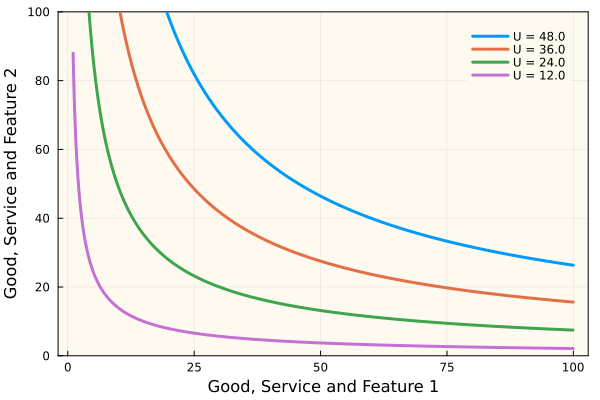

In [25]:
p = plot()
Umax = [48.0, 36.0, 24.0, 12.0];
α = [0.45,0.55];
model = build(VLCobbDouglasUtilityFunction, (
    α = α,    
));

for U ∈ Umax
    
    # setup the bounds -
    bounds = [
        1.0 100.0;
        1.0 1000.0;
    ];

    # call -
    XCD = indifference(model, utility=U, bounds=bounds, ϵ = 0.1);
    
    # plot -
    plot!(XCD[:,1],XCD[:,2],label="U = $(U)", lw=3, 
        bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent, 
        ylims=(0.0,100.0));
end
xlabel!("Good, Service and Feature 1",fontsize=18)
ylabel!("Good, Service and Feature 2",fontsize=18)
current()

### Leontief Utility Functions
The `Leontief` utility function, first developed by [Wassily Leontief](https://en.wikipedia.org/wiki/Wassily_Leontief) who was later 
awared a [Nobel Prize in Economics for his work](https://www.nobelprize.org/prizes/economic-sciences/1973/leontief/facts/), 
computes the utility for `complementary` states (or configurations) of the world, 
where each feature variable is scaled by a non-negative constant(s) $\alpha$. 
The `Leontief` utility function is given by:
    
$$
\begin{equation}
U(x_{1},\dots, x_{n}) = \min\left\{\frac{x_{1}}{\alpha_{1}},\dots,\frac{x_{n}}{\alpha_{n}}\right\}
\end{equation}
$$

where $\alpha_{i}>{0}$ and $x_{i}\geq{0}$ for all $i\in{1\dots{n}}$.

#### Indifference
The set of indifferent choices for a given utility $U^{\star}$ for a `Leontief` utility function is computed by solving the equation:

$$
\begin{equation}
\min\left\{\frac{x^{\star}_{1}}{\alpha_{1}},\dots,\frac{x^{\star}_{n}}{\alpha_{n}}\right\} - U^{\star} = 0
\end{equation}
$$

for the choices (or features) $x^{\star}_{1},\dots,x^{\star}_{m}$. We do this by creating a `VLLeontiefUtilityFunction` instance that holds the parameter vector $\alpha$, and then we use a `for` loop to iterate through a range of $U^{\star}$ values. During each pass of the loop, we:

* Setup the `lower` and `upper` bounds that are choice or feature variables are allowed to assume (we search this range for indifferent values)
* We compute the set of indifference set, by calling the `indifference(...)` method which is exported from the [VLDecisionsPackage.jl](https://github.com/varnerlab/VLDecisionsPackage.jl) package
* We plot the indifferent values using the `plot(...)` function which is exported from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package

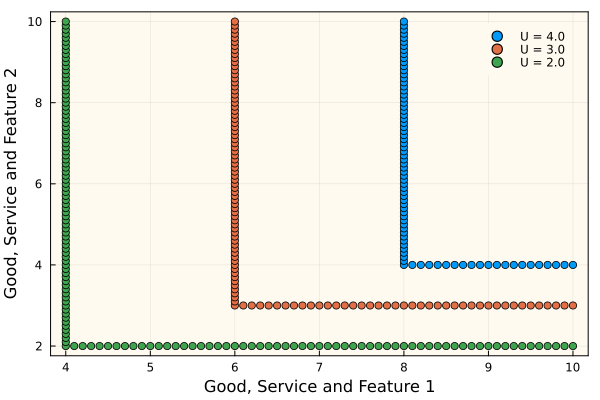

In [32]:
# setup the call -
p = plot()
Umax = [4.0, 3.0, 2.0];
α = [2.0,1.0];
model = build(VLLeontiefUtilityFunction, (
    α = α,    
));

for U ∈ Umax
    
    # setup the bounds -
    bounds = [
        0.0 10.0;
        0.0 10.0;
    ];

    # call -
    XL = indifference(model, utility=U, bounds=bounds, ϵ = 0.1);
    
    # plot -
    scatter!(XL[:,1],XL[:,2],label="U = $(U)", lw=3, 
        bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent);
end
xlabel!("Good, Service and Feature 1",fontsize=18)
ylabel!("Good, Service and Feature 2",fontsize=18)
current()